In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
from datetime import datetime
pd.set_option('max_columns', 50)
%matplotlib inline
%cd ~/Projects/hackathon/IceEdge/dataset/
# !head -n 5 merged.csv

/home/xypnox/Projects/hackathon/IceEdge/dataset


In [2]:
from_csv = pd.read_csv('merged.csv', parse_dates={'time_data': ['month', 'year']})
from_csv.head()


,time_data,id,cnt_airlines,cnt_entertainment,cnt_auto_rentals,cnt_vehicles,cnt_business_serv,cnt_clothing_stores,cnt_contracted_serv,cnt_direct_marketing,cnt_govt_serv,cnt_hotel,cnt_misc,cnt_personal_serv_prov,cnt_repair_serv,cnt_retail_stores,cnt_service_prov,cnt_transport,cnt_utilities,cnt_wholesale_distributor,tot_tran_cnt,amt_airlines,amt_entertainment,amt_auto_rentals,amt_vehicles,amt_business_serv,amt_clothing_stores,amt_contracted_serv,amt_direct_marketing,amt_govt_serv,amt_hotel,amt_misc,amt_personal_serv_prov,amt_repair_serv,amt_retail_stores,amt_service_prov,amt_transport,amt_utilities,amt_wholesale_distributor,tot_tran_amt,payment
0,2018-12-01,1,3,1,3,1,3,1,0,1,1,1,3,1,3,3,3,1,1,3,33,9.0,3,4,4,1,8,0,1,5,14,23,8,1,14,4,5,5,1,110.0,55.00
1,2018-12-01,2,2,3,1,2,2,1,2,2,3,2,1,2,2,1,1,2,1,3,33,511.0,198,249,224,70,479,13,70,313,811,1335,460,32,792,224,300,275,32,6388.0,3194.00
2,2018-12-01,3,1,1,2,3,3,1,1,1,1,1,2,1,3,2,1,1,2,1,28,30.0,12,15,13,4,28,1,4,18,48,78,27,2,46,13,18,16,2,375.0,375.00
3,2018-12-01,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00
4,2018-12-01,5,2,2,2,2,3,1,3,2,1,1,3,1,1,2,2,1,3,1,33,2324.0,901,1133,1017,320,2179,58,320,1423,3689,6071,2091,145,3602,1017,1365,1249,145,29049.0,1452.45


In [3]:
from_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767442 entries, 0 to 767441
Data columns (total 41 columns):
time_data                    767442 non-null datetime64[ns]
id                           767442 non-null int64
cnt_airlines                 767442 non-null int64
cnt_entertainment            767442 non-null int64
cnt_auto_rentals             767442 non-null int64
cnt_vehicles                 767442 non-null int64
cnt_business_serv            767442 non-null int64
cnt_clothing_stores          767442 non-null int64
cnt_contracted_serv          767442 non-null int64
cnt_direct_marketing         767442 non-null int64
cnt_govt_serv                767442 non-null int64
cnt_hotel                    767442 non-null int64
cnt_misc                     767442 non-null int64
cnt_personal_serv_prov       767442 non-null int64
cnt_repair_serv              767442 non-null int64
cnt_retail_stores            767442 non-null int64
cnt_service_prov             767442 non-null int64
cnt_transport

In [4]:
from_csv.describe()

,id,cnt_airlines,cnt_entertainment,cnt_auto_rentals,cnt_vehicles,cnt_business_serv,cnt_clothing_stores,cnt_contracted_serv,cnt_direct_marketing,cnt_govt_serv,cnt_hotel,cnt_misc,cnt_personal_serv_prov,cnt_repair_serv,cnt_retail_stores,cnt_service_prov,cnt_transport,cnt_utilities,cnt_wholesale_distributor,tot_tran_cnt,amt_airlines,amt_entertainment,amt_auto_rentals,amt_vehicles,amt_business_serv,amt_clothing_stores,amt_contracted_serv,amt_direct_marketing,amt_govt_serv,amt_hotel,amt_misc,amt_personal_serv_prov,amt_repair_serv,amt_retail_stores,amt_service_prov,amt_transport,amt_utilities,amt_wholesale_distributor,tot_tran_amt,payment
count,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,7.674420e+05,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,7.674420e+05,7.674420e+05
mean,20011.136934,1.939498,1.300063,1.940295,1.390181,1.940040,1.150882,1.986867,1.857959,1.215061,1.046780,3.400822,1.140068,1.940007,2.942383,1.940901,1.081304,1.215280,1.939526,31.367917,9.810800e+05,345.664415,434.843746,390.256409,122.715358,836.151322,216.667249,122.715358,546.317352,1415.813738,2329.898666,802.708765,55.844185,1382.372515,390.256409,524.022798,479.435560,55.844185,9.915315e+05,6.917795e+05
std,11546.215071,0.870207,0.699561,0.873450,0.759823,0.872866,0.444952,1.846236,0.879689,0.626125,0.381692,1.296870,0.541385,0.873230,1.148317,0.873201,0.454202,0.625952,0.873338,5.316408,4.443163e+07,676.336269,850.874253,763.604181,239.992960,1636.293696,3290.818532,239.992960,1069.045876,2770.789641,4559.803220,1570.842396,109.082401,2705.338029,763.604181,1025.411464,938.142207,109.082401,4.443140e+07,3.503780e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,10018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,4.400000e+01,17.000000,21.000000,19.000000,6.000000,40.000000,1.000000,6.000000,26.000000,68.000000,112.000000,39.000000,3.000000,66.000000,19.000000,25.000000,23.000000,3.000000,5.960000e+02,3.310000e+02
50%,20019.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,32.000000,2.150000e+02,82.000000,103.000000,93.000000,29.000000,199.000000,6.000000,29.000000,130.000000,337.000000,554.000000,191.000000,13.000000,329.000000,93.000000,125.000000,114.000000,13.000000,2.826000e+03,1.612000e+03
75%,30007.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,3.000000,3.000000,1.000000,1.000000,4.000000,1.000000,3.000000,4.000000,3.000000,1.000000,1.000000,3.000000,34.000000,9.330000e+02,356.000000,448.000000,402.000000,127.000000,862.000000,26.000000,127.000000,563.000000,1460.000000,2403.000000,828.000000,58.000000,1425.750000,402.000000,540.000000,494.000000,58.000000,1.197000e+04,7.396000e+03
max,40000.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,30.000000,3.000000,3.000000,3.000000,10.000000,3.000000,3.000000,8.000000,3.000000,3.000000,3.000000,3.000000,46.000000,8.814949e+09,14950.000000,18808.000000,16879.000000,5305.000000,36169.000000,333748.000000,5305.000000,23631.000000,61246.000000,100791.000000,34722.000000,2411.000000,59800.00

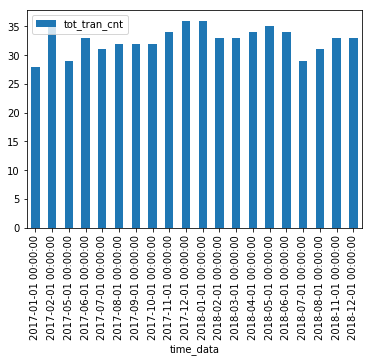

In [38]:
ids = from_csv['id']
#print(ids)
date_data = []

unsorted_data_single_customer = from_csv[from_csv['id'] == 1]
data_single_customer = unsorted_data_single_customer.sort_values(['time_data'])
#for index, row in data_single_customer.iterrows():

data_single_customer.plot('time_data', 'tot_tran_cnt', kind='bar')

In [39]:
time_data = [x.to_pydatetime() for x in data_single_customer['time_data']] 
time_data

[datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 2, 1, 0, 0),
 datetime.datetime(2017, 5, 1, 0, 0),
 datetime.datetime(2017, 6, 1, 0, 0),
 datetime.datetime(2017, 7, 1, 0, 0),
 datetime.datetime(2017, 8, 1, 0, 0),
 datetime.datetime(2017, 9, 1, 0, 0),
 datetime.datetime(2017, 10, 1, 0, 0),
 datetime.datetime(2017, 11, 1, 0, 0),
 datetime.datetime(2017, 12, 1, 0, 0),
 datetime.datetime(2018, 1, 1, 0, 0),
 datetime.datetime(2018, 2, 1, 0, 0),
 datetime.datetime(2018, 3, 1, 0, 0),
 datetime.datetime(2018, 4, 1, 0, 0),
 datetime.datetime(2018, 5, 1, 0, 0),
 datetime.datetime(2018, 6, 1, 0, 0),
 datetime.datetime(2018, 7, 1, 0, 0),
 datetime.datetime(2018, 8, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 12, 1, 0, 0)]

In [40]:
def gen_date_num(date):
    print(date)
    if date.year == 2017:
        return date.month
    return date.month+12
    
    #help(datetime)

2017-01-01 00:00:00
2017-02-01 00:00:00
2017-05-01 00:00:00
2017-06-01 00:00:00
2017-07-01 00:00:00
2017-08-01 00:00:00
2017-09-01 00:00:00
2017-10-01 00:00:00
2017-11-01 00:00:00
2017-12-01 00:00:00
2018-01-01 00:00:00
2018-02-01 00:00:00
2018-03-01 00:00:00
2018-04-01 00:00:00
2018-05-01 00:00:00
2018-06-01 00:00:00
2018-07-01 00:00:00
2018-08-01 00:00:00
2018-11-01 00:00:00
2018-12-01 00:00:00
[1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24] [28, 35, 29, 33, 31, 32, 32, 32, 34, 36, 36, 33, 33, 34, 35, 34, 29, 31, 33, 33]


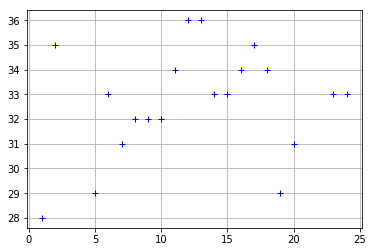

In [58]:
x = [gen_date_num(_) for _ in time_data]
y = [_ for _ in data_single_customer['tot_tran_cnt']]
print(x, y)
z4 = np.polyfit(x, y, 1)
p4 = np.poly1d(z4)

fig, cx = plt.subplots()

cx.plot(x, y, '+', color='b', label='blub')

cx.grid()
#cx.set_ylim(0, 0.03)
plt.show()

2017-01-01 00:00:00
2017-02-01 00:00:00
2017-05-01 00:00:00
2017-06-01 00:00:00
2017-07-01 00:00:00
2017-08-01 00:00:00
2017-09-01 00:00:00
2017-10-01 00:00:00
2017-11-01 00:00:00
2017-12-01 00:00:00
2018-01-01 00:00:00
2018-02-01 00:00:00
2018-03-01 00:00:00
2018-04-01 00:00:00
2018-05-01 00:00:00
2018-06-01 00:00:00
2018-07-01 00:00:00
2018-08-01 00:00:00
2018-11-01 00:00:00
2018-12-01 00:00:00


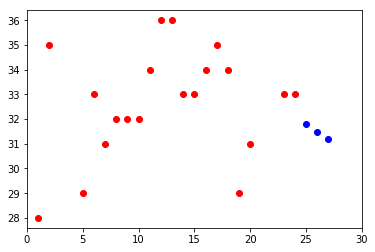

In [81]:
x = [gen_date_num(_) for _ in time_data]
y = [_ for _ in data_single_customer['tot_tran_cnt']]
fit = np.polyfit(x,y,3)
fit_fn = np.poly1d(fit)
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'ro')
# plt.plot(x, fit_fn(x), '--k')
plt.plot(25, fit_fn(25), 'bo')
plt.plot(26, fit_fn(26), 'bo')
plt.plot(27, fit_fn(27), 'bo')

plt.xlim(0, 30)
plt.show()

2017-01-01 00:00:00
2017-02-01 00:00:00
2017-05-01 00:00:00
2017-06-01 00:00:00
2017-07-01 00:00:00
2017-08-01 00:00:00
2017-09-01 00:00:00
2017-10-01 00:00:00
2017-11-01 00:00:00
2017-12-01 00:00:00
2018-01-01 00:00:00
2018-02-01 00:00:00
2018-03-01 00:00:00
2018-04-01 00:00:00
2018-05-01 00:00:00
2018-06-01 00:00:00
2018-07-01 00:00:00
2018-08-01 00:00:00
2018-11-01 00:00:00
2018-12-01 00:00:00


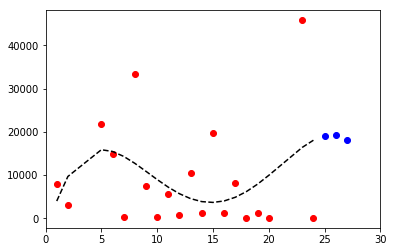

In [84]:
x = [gen_date_num(_) for _ in time_data]
y = [_ for _ in data_single_customer['tot_tran_amt']]
fit = np.polyfit(x,y,4)
fit_fn = np.poly1d(fit)
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'ro')
plt.plot(x, fit_fn(x), '--k')
plt.plot(25, fit_fn(25), 'bo')
plt.plot(26, fit_fn(26), 'bo')
plt.plot(27, fit_fn(27), 'bo')

plt.xlim(0, 30)
plt.show()

In [43]:
# amt_data = data_single_customer['tot_tran_amt'].to_numpy()
# mnth_data = data_single_customer['month']
# yr_data = data_single_customer['year']
# data_single_customer['time_data'] = datetime(data_single_customer['year'], data_single_customer['month'], 1)
# data_single_customer

In [44]:

# THIS IS FOR REFERENCE

# df = pd.DataFrame(
#     data = {
#         'Values' : data_single_customer['tot_tran_amt'].to_numpy(), 
#         'Months': [datetime(2017, _, 1) for _ in range(1,13)] + [datetime(2018, _, 1) for _ in range(1,13)]
#     }
# )
# ax = df.plot()
# ax.set_xticks(list(range(0,12)))
# ax.set_xticklabels([datetime(2017,_,1).strftime('%b') for _ in range(1,13)])
# plt.show()